# CMPE 257 - Machine Learning - Assignment 4 - Classification, Amalgamation, and Confusion

**Team Name:** Code Wizards  
**Student Name :** Darshini Venkatesha Murthy Nag   
**SJSU ID:** 016668951

**Business Objective:** To offer insights for prospective investors and home buyers to determine the viability of investing in California real estate.
This decison has to be taken by considering various features such as, Selling Price of the property, Monthly Rent Price, Proximity Ranking to various Schools, Crime Rate in the area, Walk Score etc.

**Datasets:** California Real Estate datasets available inside shared drive data folder https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

# Data Narrative

Main dataset is downloaded from redfin and is uploaded in the shared drive : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

Apart from this data, scrapped several addtional dataset from below mentioned websites to enrich the intial dataset, amalgamate it and improve the feature set and visualization to deduce the best model.

**Walk Score :** https://www.walkscore.com/

**Total crime rate , Property crime rate:** https://247wallst.com/state/crime-in-california/

**School Rating :** https://www.niche.com/places-to-live/z/95134/

**Final dataset is located at:** https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq-

The dataset contains the following columns

**SALE TYPE** : Indicates the type of sales transaction. This includes categories such as new listings, resale, foreclosure, etc.

**SOLD DATE** : The date on which the property was sold.

**PROPERTY TYPE** : This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS** : The address where the property is located.

**CITY** : The city where the property is located.

**STATE OR PROVINCE** : The state or province where the property is located.

**ZIP_CODE** : Indicates the zip code of the property's location.

**PRICE** : Indicates the selling price of the property.

**BEDS** : Indicates the number of bedrooms in the property.

**BATHS** : Indicates The number of bathrooms in the property.

**SOURCE** : The source from where the data was obtained.

**MLS#** : The Multiple Listing Service number, serves as an identifier for the property listing.

**FAVORITE** : Indicates whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED** : Indicates the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE** : Provides the geographical coordinates of the property.

**WALK_SCORE** : A score indicating the walkability of the neighborhood where the property is located.

**PROPERTY_CRIME** : Indicates the rate of property crimes in the city where the where the property is located.

**TOTAL_CRIME** : Indicates the rate of total crimes in the city where the where the property is located.

**SCHOOL_RANKING** : Provides information about the ranking of schools nearby to the property.

**MONTHLY_RENT_ESTIMATE** : Indicates the monthly rent estimate of the property.

**ANNUAL_RENT_ESTIMATE** : Indicates the annual rent estimate of the property.

**MORTGAGE_FEES_PER_MONTH** : Indicates indicate the additional costs, beyond principal and interest, included in the monthly mortgage payment, such as property taxes, insurance, and other related expenses.

**MORTGAGE_FEES_PER_YEAR** : Indicates the total annual cost of additional expenses, beyond principal and interest, associated with your mortgage, including property taxes, insurance, and related fees.

In [32]:
# Necessary Imports

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import folium
from folium import plugins
from IPython.display import IFrame
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve



In [33]:
# Loading the datasets
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
df = pd.read_csv("RF_Housingdata_final_new.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 35 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

**DATA CLEANING AND PREPARATION**

In [34]:
data=df
#DS1
# Clean the data
column_to_drop = [0,1,2,3,4,5,10,13,14,17,18,19,20,21,22,23,24,27,28,29,30,32,34]
data = data.drop(columns=data.columns[column_to_drop])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 4042 non-null   int64  
 1   PRICE                    4042 non-null   int64  
 2   BEDS                     3901 non-null   float64
 3   BATHS                    3807 non-null   float64
 4   SQUARE FEET              3854 non-null   float64
 5   LOT SIZE                 3173 non-null   float64
 6   $/SQUARE FEET            3854 non-null   float64
 7   HOA/MONTH                1563 non-null   float64
 8   LATITUDE                 4042 non-null   float64
 9   LONGITUDE                4042 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    4042 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  4042 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 379.1 KB


In [35]:
# Drop rows with missing values in the "$/SQUARE FEET" column
data = data.dropna(subset=['BEDS','BATHS','SQUARE FEET','LOT SIZE','$/SQUARE FEET'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   int64  
 1   PRICE                    2886 non-null   int64  
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                968 non-null    float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 293.1 KB


In [36]:
# Assume if HOA is not listed in redfin then the property has no HOA
data['HOA/MONTH'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   int64  
 1   PRICE                    2886 non-null   int64  
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   int64  
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 293.1 KB


<ipython-input-36-3aeae526e31b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOA/MONTH'].fillna(0, inplace=True)


In [37]:
#convert non numeric values to numeric

data['PRICE'] = data['PRICE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ZIP_CODE'] = data['ZIP_CODE'].astype(float)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 4041
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 11  MORTGAGE_FEES_PER_MONTH  2886 non-null   float64
dtypes: float64(12)
memory usage: 293.1 KB


<ipython-input-37-80709430bcbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PRICE'] = data['PRICE'].astype(float)
<ipython-input-37-80709430bcbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
<ipython-input-37-80709430bcbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [38]:
null_columns = data.columns[data.isnull().any()].tolist()

if len(null_columns) > 0:
    print("Columns with null values:", null_columns)
else:
    print("No columns have null values.")

No columns have null values.


**APPLY MULLER LOOP ON DS1**

In [39]:
#APPLY MULLER LOOP on DS1
data['Invest_or_Not'] = np.where(data['MONTHLY_RENT_ESTIMATE']> (data['MORTGAGE_FEES_PER_MONTH']+data['HOA/MONTH']+2000), 1, 0)
data

,ZIP_CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,MONTHLY_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,Invest_or_Not
0,94610.0,535000.0,1.0,1.0,971.0,19457.0,551.0,536.0,37.817373,-122.254688,5350.0,3203.0,0
1,94618.0,1075000.0,1.0,1.0,1265.0,9000.0,850.0,0.0,37.835305,-122.221226,10750.0,6437.0,1
2,94608.0,589000.0,1.0,1.0,1051.0,30135.0,560.0,477.0,37.835468,-122.276067,5890.0,3527.0,0
3,94610.0,439000.0,1.0,1.0,715.0,17016.0,614.0,514.0,37.814753,-122.255872,4390.0,2629.0,0
4,94611.0,419000.0,1.0,1.0,757.0,8303.0,554.0,387.0,37.820653,-122.249832,4190.0,2509.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,94061.0,4998000.0,6.0,5.5,4320.0,8540.0,1157.0,0.0,37.453001,-122.218121,49980.0,29927.0,1
4038,94027.0,14988000.0,7.0,8.5,11660.0,49484.0,1285.0,0.0,37.439079,-122.217037,149880.0,89744.0,1
4039,94027.0,14500000.0,6.0,7.0,9892.0,48319.0,1466.0,0.0,37.439335,-122.229980,145000.0,86822.0,1
4040,94027.0,12850000.0,4.0,5.5,7559.0,52010.0,1700.0,0.0,37.462497,-122.212493,128500.0,76942.0,1


In [40]:
invest_or_not_0_count = (data['Invest_or_Not'] == 0).sum()
print("Number of rows with Invest_or_Not as 0:", invest_or_not_0_count)

Number of rows with Invest_or_Not as 0: 257


In [41]:
#split and train
X = data[['ZIP_CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET','LOT SIZE','Invest_or_Not']]
y = data['Invest_or_Not']

In [42]:
def mullerclassifierloop(data):
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(2),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        #     GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X =  StandardScaler().fit_transform(data.drop(columns='Invest_or_Not'))
    y = data['Invest_or_Not'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

    results = []  # Store results in a list of dictionaries
    max_score = 0.0
    max_class = ''

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = 100.0 * clf.score(X_test, y_test)
        pred = clf.predict(X_train)
        # F1 Score matrix
        f1 = f1_score(y_train, pred, average='macro')
        print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
        print('F1 SCORE = %.2f,' %(f1))

        # Append results to the list
        results.append({'Classifier': name, 'Accuracy': score, 'F1 Score': f1})

        fig, ax = plt.subplots()
        # Confusion matrix
        cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.poof()

        if score > max_score:
            clf_best = clf
            max_score = score
            max_class = name

    print(80*'-' )
    print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
    print(80*'-' )

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results)

    return results_df


Classifier = Nearest Neighbors, Score (test, accuracy) = 94.64,
F1 SCORE = 0.96,


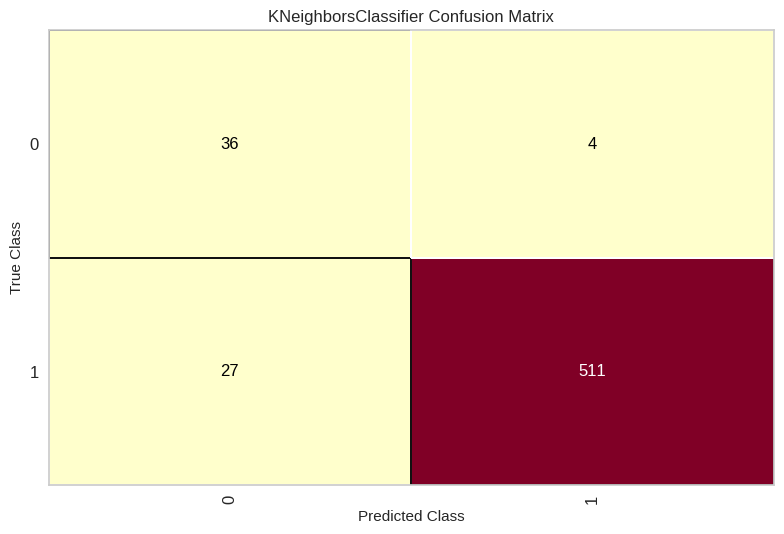

Classifier = Linear SVM, Score (test, accuracy) = 93.08,
F1 SCORE = 0.48,


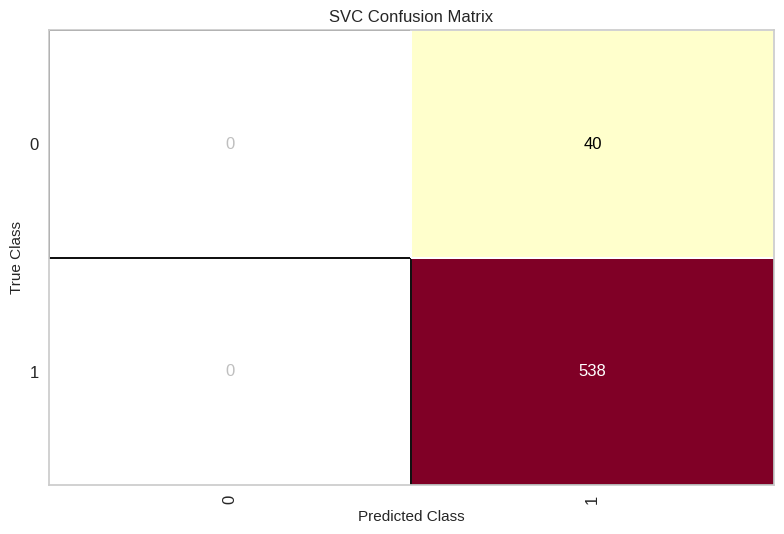

Classifier = RBF SVM, Score (test, accuracy) = 97.75,
F1 SCORE = 0.89,


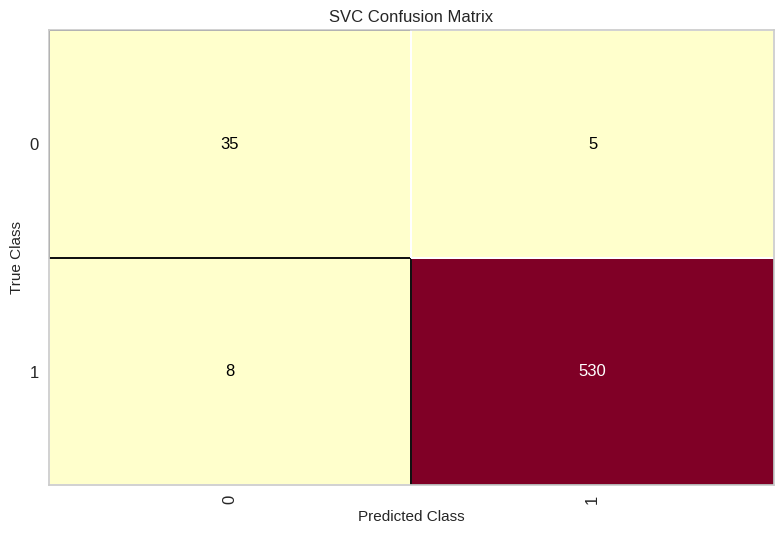

Classifier = Decision Tree, Score (test, accuracy) = 98.44,
F1 SCORE = 0.97,


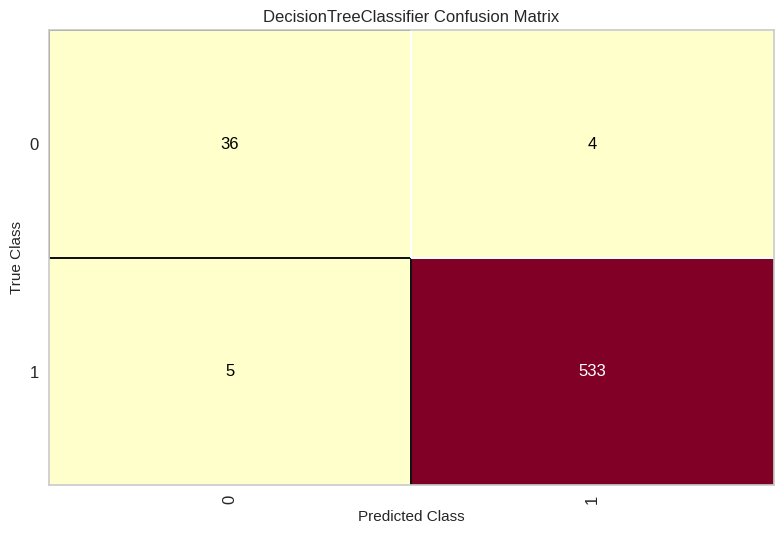

Classifier = Random Forest, Score (test, accuracy) = 98.79,
F1 SCORE = 0.94,


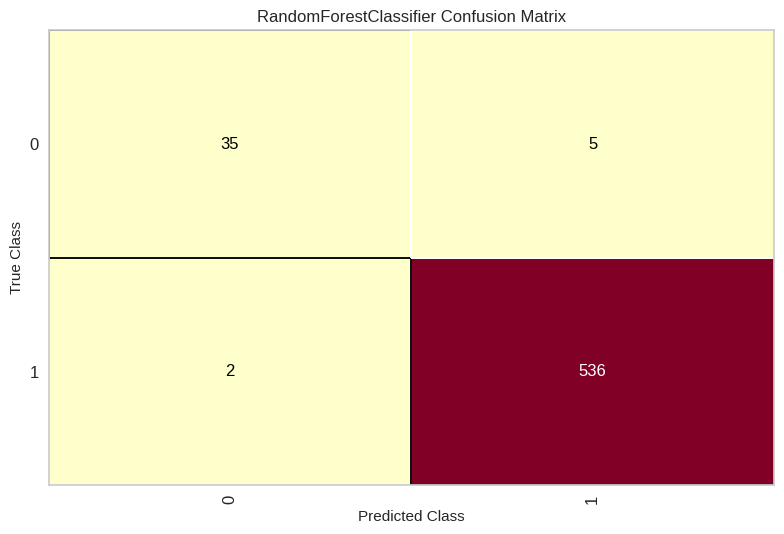

Classifier = Neural Net, Score (test, accuracy) = 96.19,
F1 SCORE = 0.83,


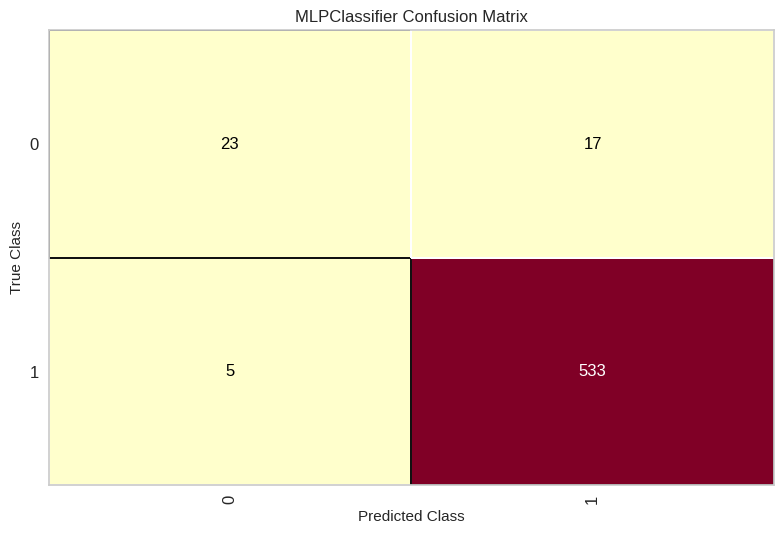

Classifier = AdaBoost, Score (test, accuracy) = 99.31,
F1 SCORE = 0.97,


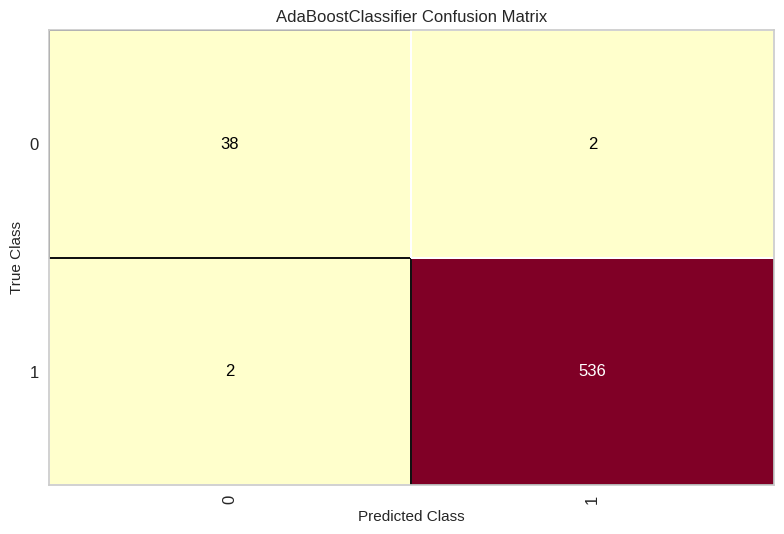

Classifier = Naive Bayes, Score (test, accuracy) = 82.35,
F1 SCORE = 0.72,


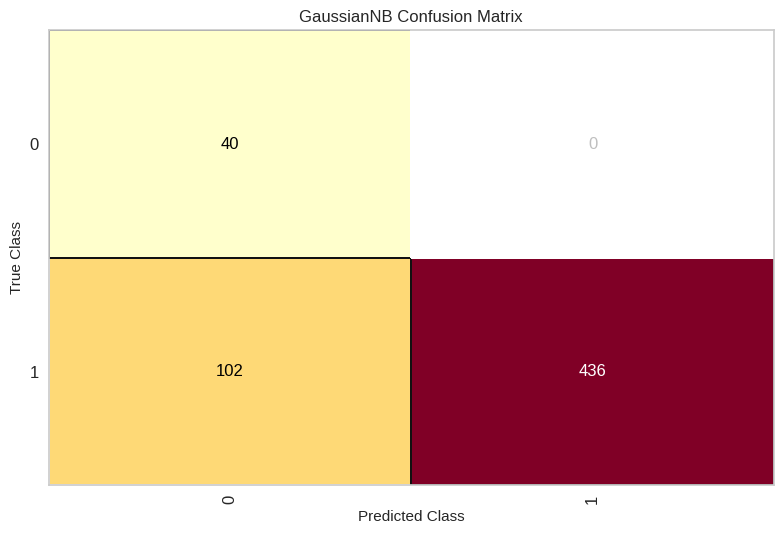

Classifier = QDA, Score (test, accuracy) = 82.70,
F1 SCORE = 0.70,


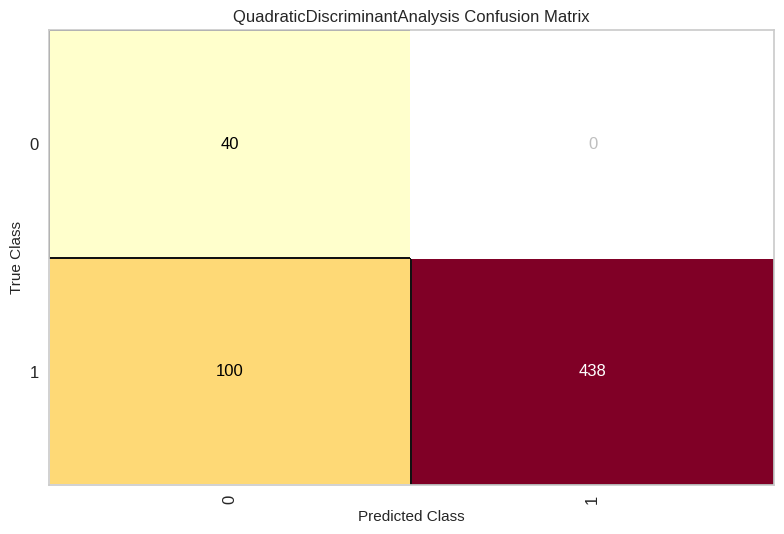

--------------------------------------------------------------------------------
Best --> Classifier = AdaBoost, Score (test, accuracy) = 99.31
--------------------------------------------------------------------------------


In [43]:
result1=mullerclassifierloop(X)

In [44]:
# RESULTS OF DATASET1
result1

,Classifier,Accuracy,F1 Score
0,Nearest Neighbors,94.636678,0.959577
1,Linear SVM,93.079585,0.475335
2,RBF SVM,97.750865,0.890733
3,Decision Tree,98.442907,0.969419
4,Random Forest,98.788927,0.943504
5,Neural Net,96.193772,0.830851
6,AdaBoost,99.307958,0.971553
7,Naive Bayes,82.352941,0.715080
8,QDA,82.698962,0.703869


In [45]:
# Amalgamate DS1+DS2
# Adding scraped data WALKSCORE
data2=df.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 35 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

In [46]:
column_to_drop = [0,1,2,3,4,5,10,13,14,17,18,19,20,21,22,23,24,28,29,30,32,34]
data2 = data2.drop(columns=data2.columns[column_to_drop])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 4042 non-null   int64  
 1   PRICE                    4042 non-null   int64  
 2   BEDS                     3901 non-null   float64
 3   BATHS                    3807 non-null   float64
 4   SQUARE FEET              3854 non-null   float64
 5   LOT SIZE                 3173 non-null   float64
 6   $/SQUARE FEET            3854 non-null   float64
 7   HOA/MONTH                1563 non-null   float64
 8   LATITUDE                 4042 non-null   float64
 9   LONGITUDE                4042 non-null   float64
 10  WALK_SCORE               4042 non-null   int64  
 11  MONTHLY_RENT_ESTIMATE    4042 non-null   int64  
 12  MORTGAGE_FEES_PER_MONTH  4042 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 410.6 KB


In [47]:
# Drop rows with missing values in the "$/SQUARE FEET" column
data2 = data2.dropna(subset=['BEDS','BATHS','SQUARE FEET','LOT SIZE','$/SQUARE FEET'])
data2.reset_index(drop=True, inplace=True)
# Assume if HOA is not listed in redfin then the property has no HOA
data2['HOA/MONTH'].fillna(0, inplace=True)
#convert non numeric values to numeric

data2['PRICE'] = data2['PRICE'].astype(float)
data2['MORTGAGE_FEES_PER_MONTH'] = data2['MORTGAGE_FEES_PER_MONTH'].astype(float)
data2['MONTHLY_RENT_ESTIMATE'] = data2['MONTHLY_RENT_ESTIMATE'].astype(float)
data2['WALK_SCORE'] = data2['WALK_SCORE'].astype(float)
data2['ZIP_CODE'] = data2['ZIP_CODE'].astype(float)
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  WALK_SCORE               2886 non-null   float64
 11  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 12  MORTGAGE_FEES_PER_MONTH  2886 non-null   float64
dtypes: float64(13)
memory usage: 293.2 KB


In [48]:
columns_with_nulls = data2.columns[data2.isnull().any()].tolist()

if len(columns_with_nulls) > 0:
    print("Columns with null values:", columns_with_nulls)
else:
    print("No columns have null values.")

No columns have null values.


**APPLY MULLER LOOP ON DS1+DS2**

In [49]:
#APPLY MULLER LOOP on DS1+DS2
data2['Invest_or_Not'] = np.where(data2['MONTHLY_RENT_ESTIMATE']> (data2['MORTGAGE_FEES_PER_MONTH']+data2['HOA/MONTH']+2000), 1, 0)


In [50]:

data2.info()
#split and train
X2 = data2[['ZIP_CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET','WALK_SCORE','Invest_or_Not']]
y2 = data2['Invest_or_Not']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  WALK_SCORE               2886 non-null   float64
 11  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 12  MORTGAGE_FEES_PER_MONTH  2886 non-null   float64
 13  Invest_or_Not            2886 non-null   int64  
dtypes: float64(13), int64(1)

Classifier = Nearest Neighbors, Score (test, accuracy) = 92.21,
F1 SCORE = 0.93,


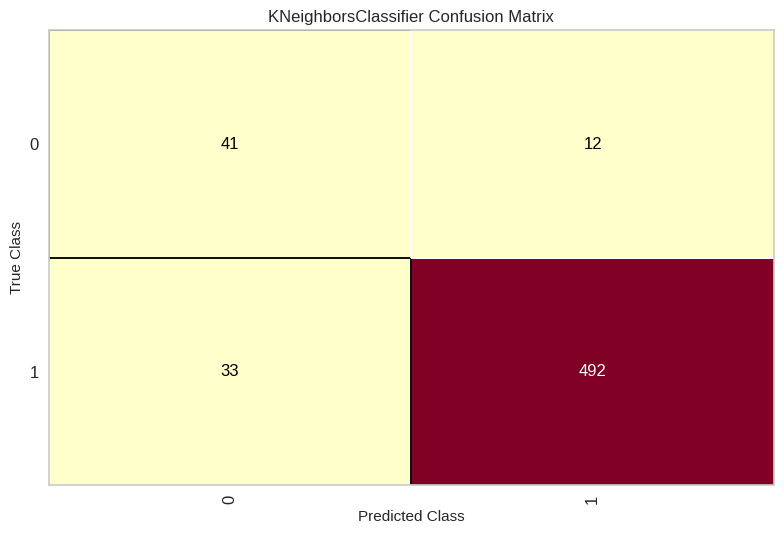

Classifier = Linear SVM, Score (test, accuracy) = 90.83,
F1 SCORE = 0.48,


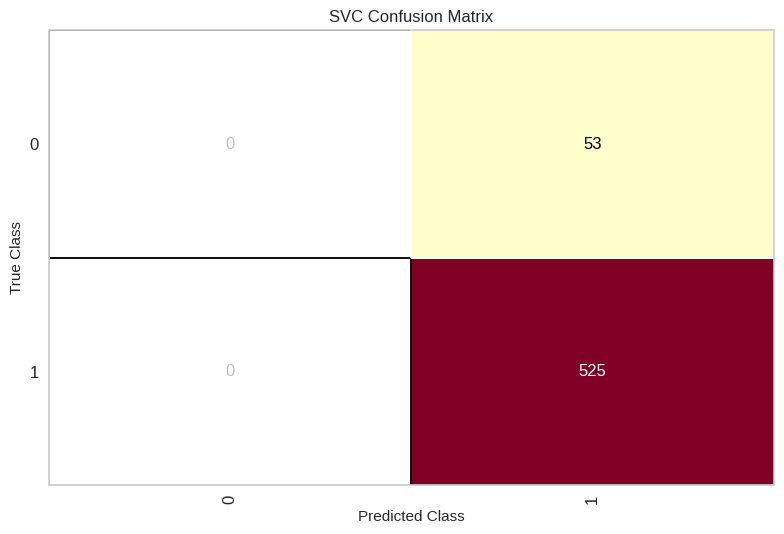

Classifier = RBF SVM, Score (test, accuracy) = 94.81,
F1 SCORE = 0.89,


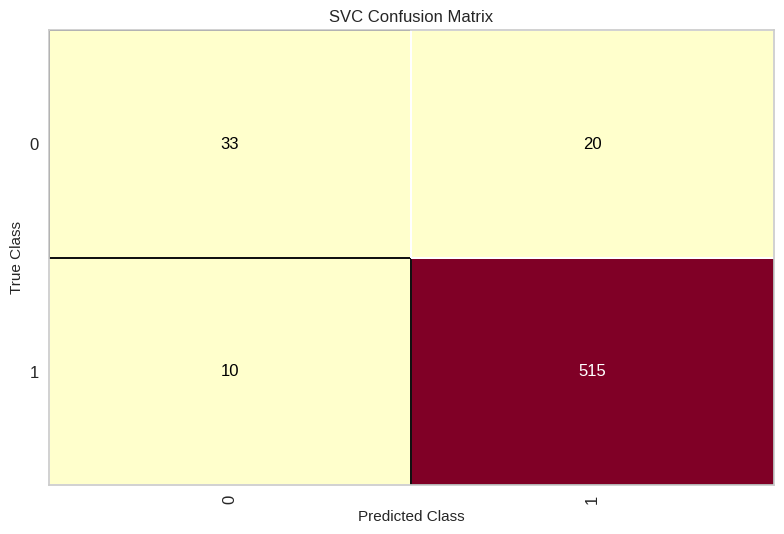

Classifier = Decision Tree, Score (test, accuracy) = 98.10,
F1 SCORE = 0.95,


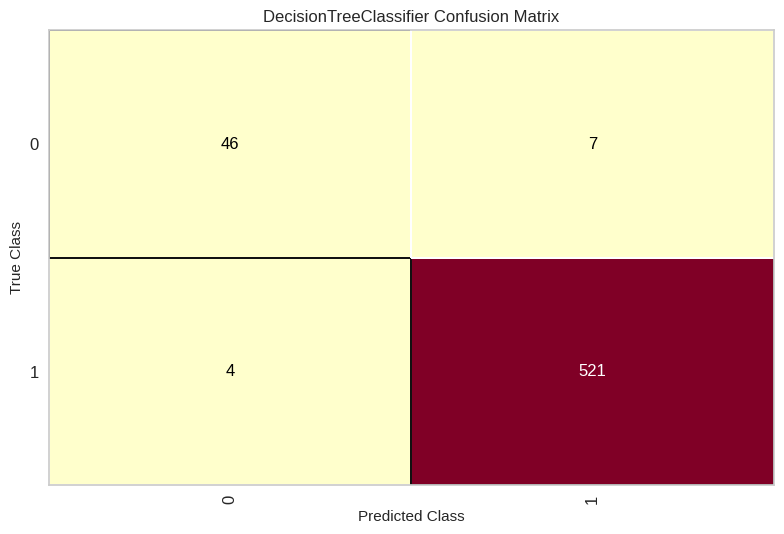

Classifier = Random Forest, Score (test, accuracy) = 96.71,
F1 SCORE = 0.92,


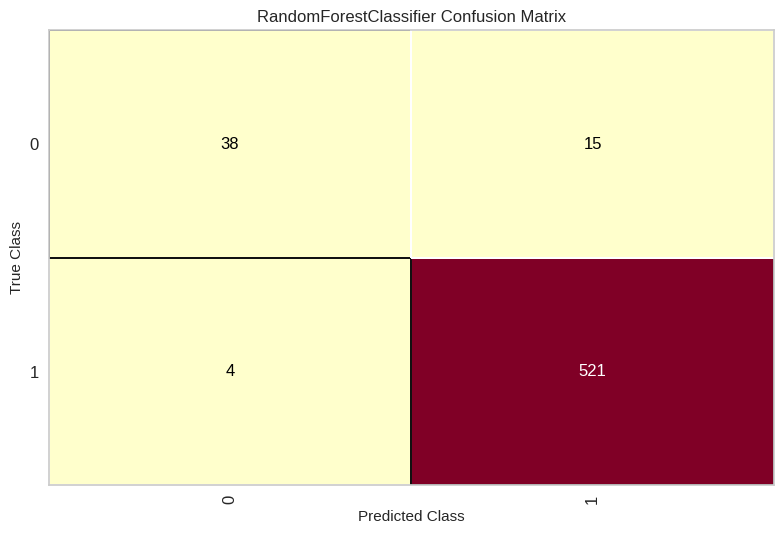

Classifier = Neural Net, Score (test, accuracy) = 95.16,
F1 SCORE = 0.84,


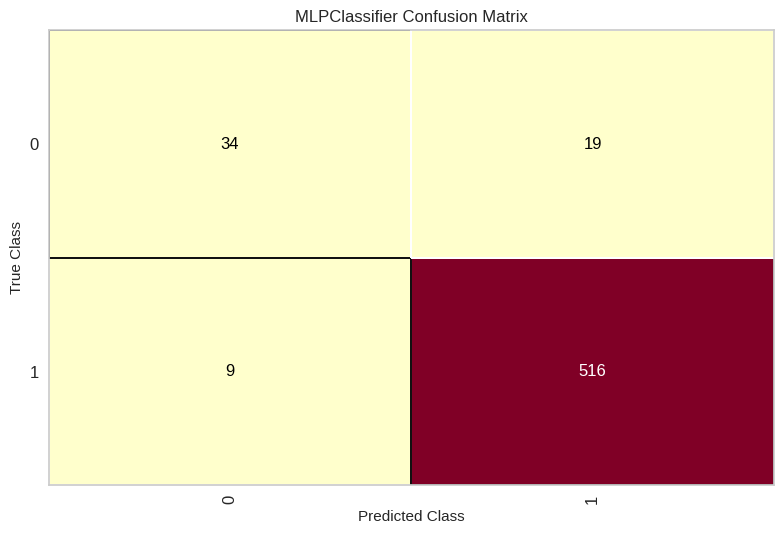

Classifier = AdaBoost, Score (test, accuracy) = 98.10,
F1 SCORE = 0.96,


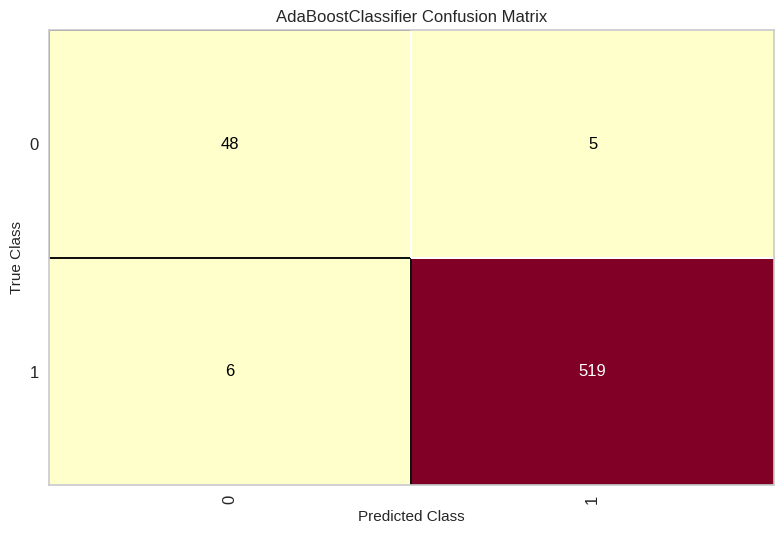

Classifier = Naive Bayes, Score (test, accuracy) = 89.27,
F1 SCORE = 0.79,


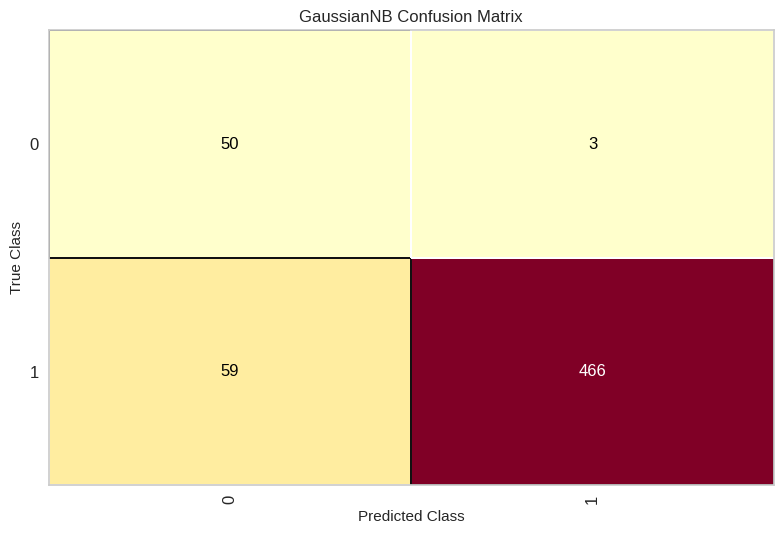

Classifier = QDA, Score (test, accuracy) = 89.79,
F1 SCORE = 0.81,


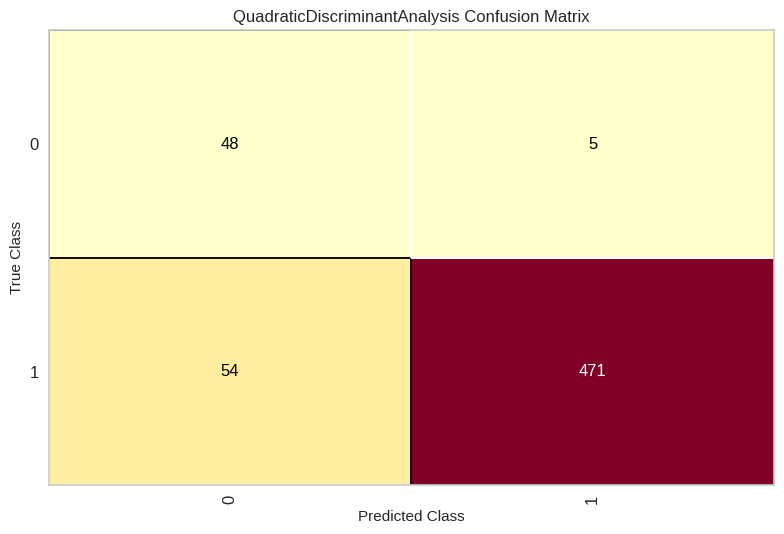

--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 98.10
--------------------------------------------------------------------------------


In [51]:
result2=mullerclassifierloop(X2)

In [52]:
result2

,Classifier,Accuracy,F1 Score
0,Nearest Neighbors,92.214533,0.928665
1,Linear SVM,90.830450,0.476881
2,RBF SVM,94.809689,0.894015
3,Decision Tree,98.096886,0.953680
4,Random Forest,96.712803,0.921824
5,Neural Net,95.155709,0.842637
6,AdaBoost,98.096886,0.962964
7,Naive Bayes,89.273356,0.793276
8,QDA,89.792388,0.808168


In [53]:
# Amalgamate DS1+DS2+DS3
# Adding scraped data Property Crime + Total Crime rates
data3=df.copy()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 35 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    4042 non-null   object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                4042 non-null   object 
 3   ADDRESS                                                                                      4031 non-null   object 
 4   CITY                                                                                         4042 non-null   object 
 5   STATE OR PROVINCE                 

In [54]:
drop_columns = [0,1,2,3,4,5,10,13,14,17,18,19,20,21,22,23,24,30,32,34]
data3 = data3.drop(columns=data3.columns[drop_columns])
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 4042 non-null   int64  
 1   PRICE                    4042 non-null   int64  
 2   BEDS                     3901 non-null   float64
 3   BATHS                    3807 non-null   float64
 4   SQUARE FEET              3854 non-null   float64
 5   LOT SIZE                 3173 non-null   float64
 6   $/SQUARE FEET            3854 non-null   float64
 7   HOA/MONTH                1563 non-null   float64
 8   LATITUDE                 4042 non-null   float64
 9   LONGITUDE                4042 non-null   float64
 10  WALK_SCORE               4042 non-null   int64  
 11  PROPERTY_CRIME           4042 non-null   int64  
 12  TOTAL_CRIME              4042 non-null   int64  
 13  MONTHLY_RENT_ESTIMATE    4042 non-null   int64  
 14  MORTGAGE_FEES_PER_MONTH 

In [55]:
# Drop rows with missing values in the "$/SQUARE FEET" column

data3 = data3.dropna(subset=['BEDS','BATHS','SQUARE FEET','LOT SIZE','$/SQUARE FEET'])
data3.reset_index(drop=True, inplace=True)

# Assume if HOA is not listed in redfin then the property has no HOA
data3['HOA/MONTH'].fillna(0, inplace=True)

#convert non numeric values to numeric
data3['PRICE'] = data3['PRICE'].astype(float)
data3['MORTGAGE_FEES_PER_MONTH'] = data3['MORTGAGE_FEES_PER_MONTH'].astype(float)
data3['MONTHLY_RENT_ESTIMATE'] = data3['MONTHLY_RENT_ESTIMATE'].astype(float)
data3['WALK_SCORE'] = data3['WALK_SCORE'].astype(float)
data3['PROPERTY_CRIME'] = data3['PROPERTY_CRIME'].astype(float)
data3['TOTAL_CRIME'] = data3['TOTAL_CRIME'].astype(float)
data3['ZIP_CODE'] = data3['ZIP_CODE'].astype(float)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  WALK_SCORE               2886 non-null   float64
 11  PROPERTY_CRIME           2886 non-null   float64
 12  TOTAL_CRIME              2886 non-null   float64
 13  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 14  MORTGAGE_FEES_PER_MONTH 

**APPLY MULLER LOOP ON DS1+DS2+DS3**

In [56]:
#APPLY MULLER LOOP on DS1+DS2+DS3

data3['Invest_or_Not'] = np.where(data3['MONTHLY_RENT_ESTIMATE']> (data3['MORTGAGE_FEES_PER_MONTH']+data3['HOA/MONTH']+2000), 1, 0)

In [57]:
data3.info()

#split and train
X3 = data3[['ZIP_CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET','WALK_SCORE','PROPERTY_CRIME','TOTAL_CRIME','Invest_or_Not']]
y3 = data3['Invest_or_Not']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_CODE                 2886 non-null   float64
 1   PRICE                    2886 non-null   float64
 2   BEDS                     2886 non-null   float64
 3   BATHS                    2886 non-null   float64
 4   SQUARE FEET              2886 non-null   float64
 5   LOT SIZE                 2886 non-null   float64
 6   $/SQUARE FEET            2886 non-null   float64
 7   HOA/MONTH                2886 non-null   float64
 8   LATITUDE                 2886 non-null   float64
 9   LONGITUDE                2886 non-null   float64
 10  WALK_SCORE               2886 non-null   float64
 11  PROPERTY_CRIME           2886 non-null   float64
 12  TOTAL_CRIME              2886 non-null   float64
 13  MONTHLY_RENT_ESTIMATE    2886 non-null   float64
 14  MORTGAGE_FEES_PER_MONTH 

Classifier = Nearest Neighbors, Score (test, accuracy) = 91.87,
F1 SCORE = 0.93,


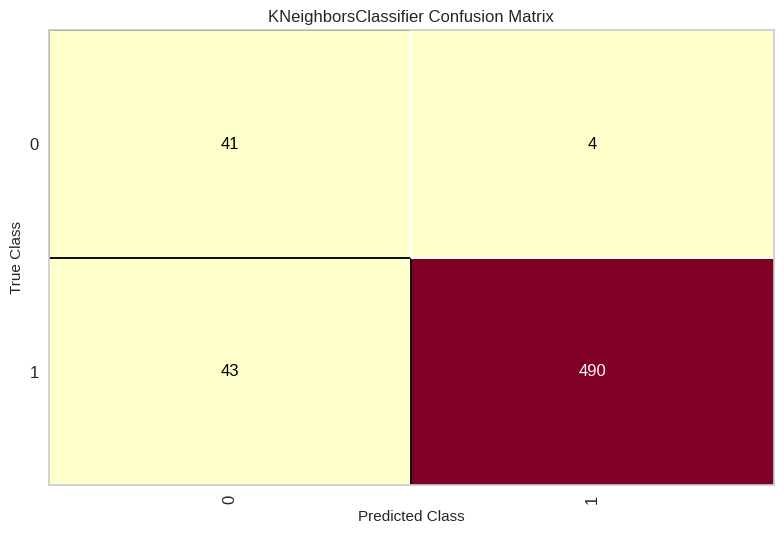

Classifier = Linear SVM, Score (test, accuracy) = 92.21,
F1 SCORE = 0.48,


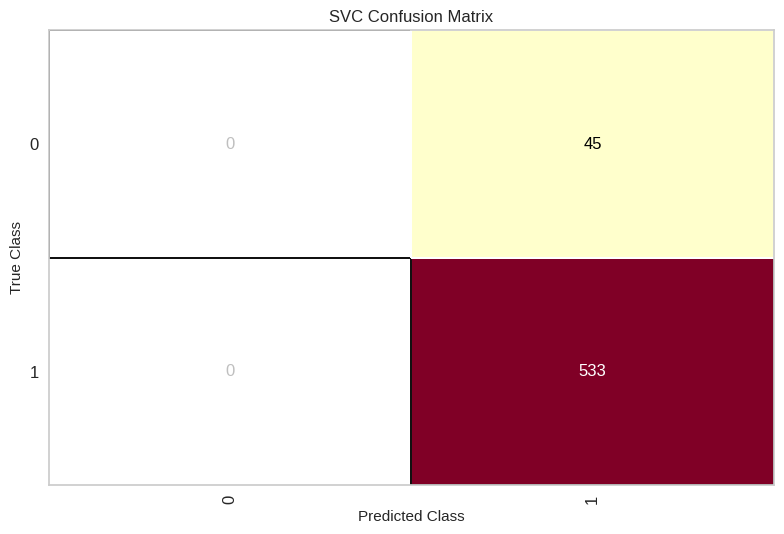

Classifier = RBF SVM, Score (test, accuracy) = 96.37,
F1 SCORE = 0.88,


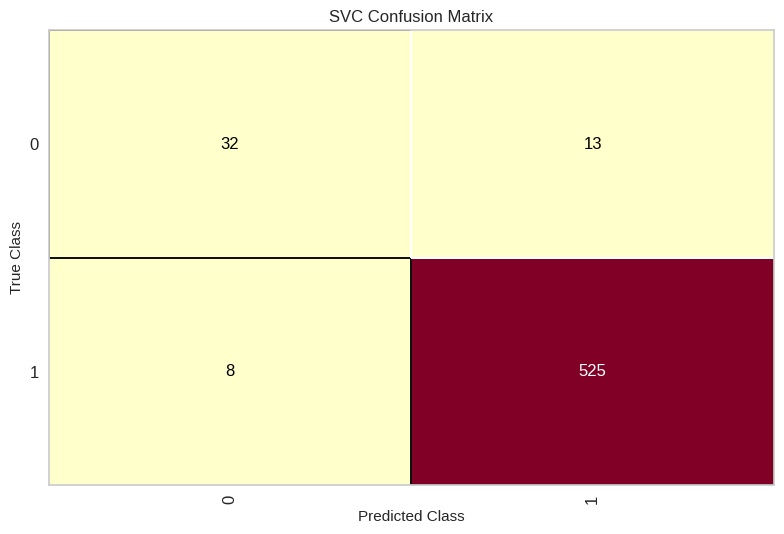

Classifier = Decision Tree, Score (test, accuracy) = 98.10,
F1 SCORE = 0.96,


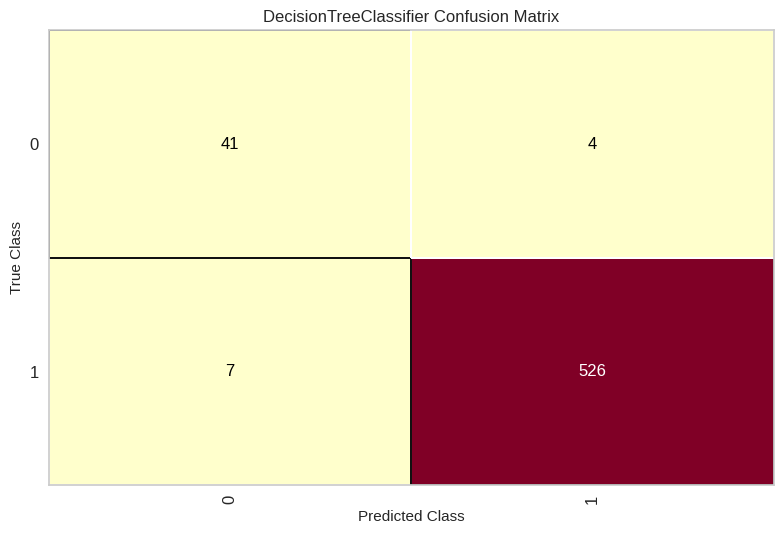

Classifier = Random Forest, Score (test, accuracy) = 96.89,
F1 SCORE = 0.93,


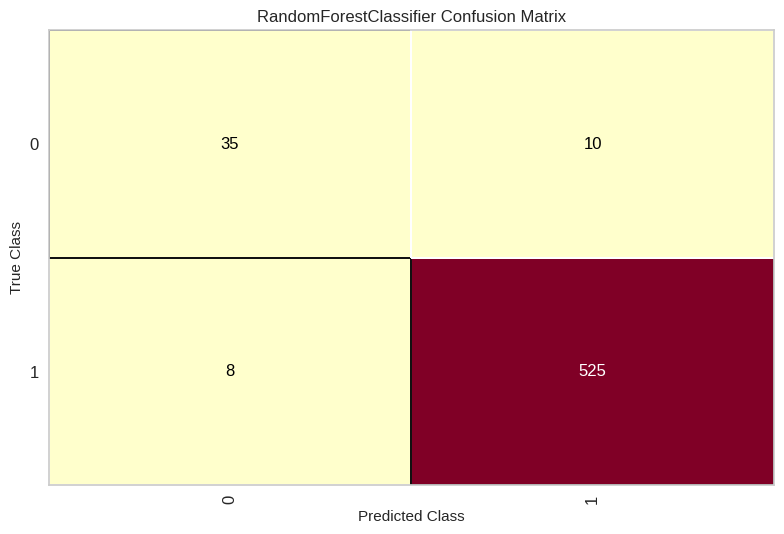

Classifier = Neural Net, Score (test, accuracy) = 94.98,
F1 SCORE = 0.84,


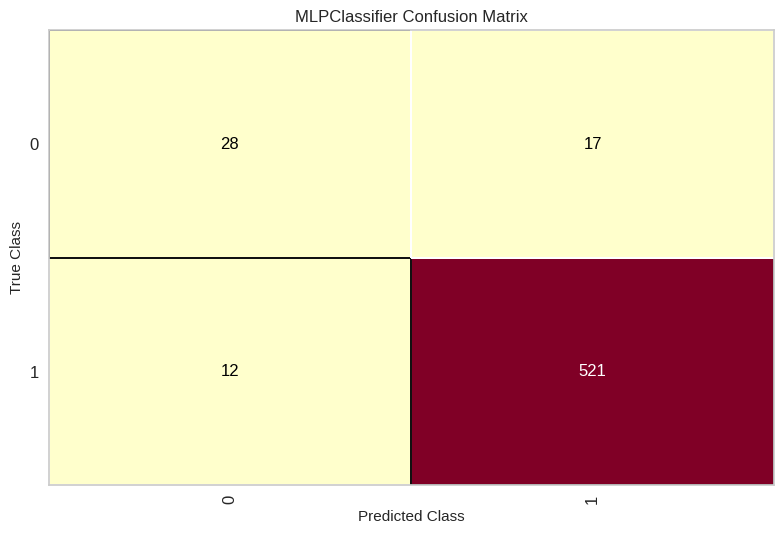

Classifier = AdaBoost, Score (test, accuracy) = 97.58,
F1 SCORE = 0.97,


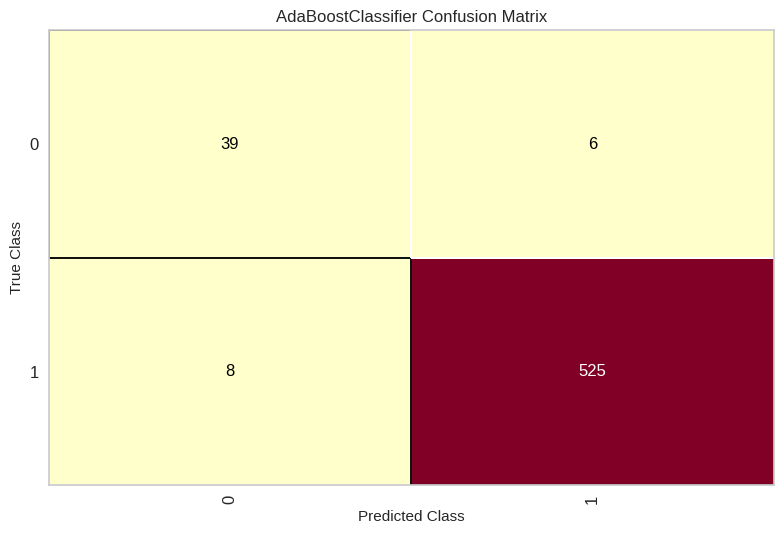

Classifier = Naive Bayes, Score (test, accuracy) = 87.02,
F1 SCORE = 0.79,


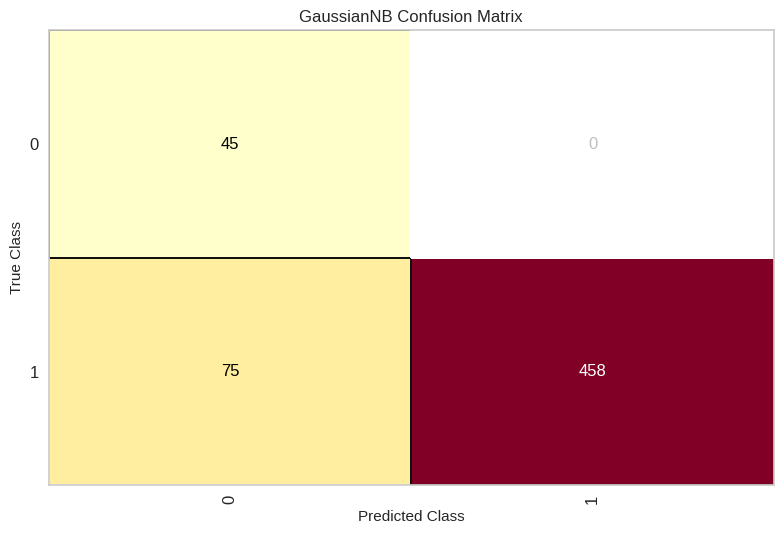

Classifier = QDA, Score (test, accuracy) = 88.41,
F1 SCORE = 0.81,


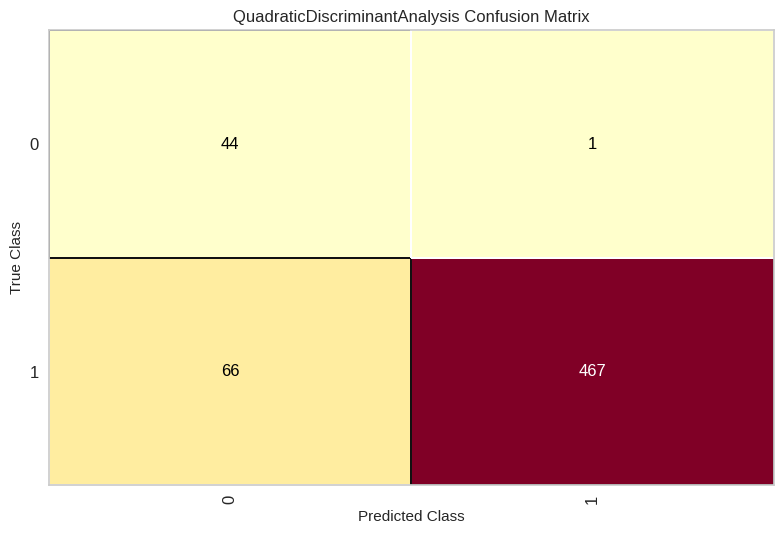

--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 98.10
--------------------------------------------------------------------------------


In [58]:
result3=mullerclassifierloop(X3)

In [59]:
result3

,Classifier,Accuracy,F1 Score
0,Nearest Neighbors,91.868512,0.927689
1,Linear SVM,92.214533,0.475931
2,RBF SVM,96.366782,0.884338
3,Decision Tree,98.096886,0.962359
4,Random Forest,96.885813,0.928988
5,Neural Net,94.982699,0.840078
6,AdaBoost,97.577855,0.965505
7,Naive Bayes,87.024221,0.791729
8,QDA,88.408304,0.808719


In [60]:
result1['Dataset'] = 'ds1'
result2['Dataset'] = 'ds1+ds2'
result3['Dataset'] = 'ds1+ds2+ds3'
combined_results = pd.concat([result1, result2, result3], ignore_index=True)
print(combined_results)

           Classifier   Accuracy  F1 Score      Dataset
0   Nearest Neighbors  94.636678  0.959577          ds1
1          Linear SVM  93.079585  0.475335          ds1
2             RBF SVM  97.750865  0.890733          ds1
3       Decision Tree  98.442907  0.969419          ds1
4       Random Forest  98.788927  0.943504          ds1
5          Neural Net  96.193772  0.830851          ds1
6            AdaBoost  99.307958  0.971553          ds1
7         Naive Bayes  82.352941  0.715080          ds1
8                 QDA  82.698962  0.703869          ds1
9   Nearest Neighbors  92.214533  0.928665      ds1+ds2
10         Linear SVM  90.830450  0.476881      ds1+ds2
11            RBF SVM  94.809689  0.894015      ds1+ds2
12      Decision Tree  98.096886  0.953680      ds1+ds2
13      Random Forest  96.712803  0.921824      ds1+ds2
14         Neural Net  95.155709  0.842637      ds1+ds2
15           AdaBoost  98.096886  0.962964      ds1+ds2
16        Naive Bayes  89.273356  0.793276      

# Conclusion

To determine which dataset combination (ds1, ds1+ds2, or ds1+ds2+ds3) produces the best results, we can consider several factors such as accuracy and F1 score. Typically, a better dataset is one that yields higher accuracy and F1 scores.

Based on the above results, we can make the following observations:

**Decision Tree Classifier:** The accuracy and F1 score generally improve as you add more datasets (ds1+ds2, ds1+ds2+ds3) compared to ds1 alone.

**Random Forest Classifier:** Similar to the Decision Tree, the accuracy and F1 score also improve with the addition of more datasets.

**Neural Net (Neural Network) Classifier:** In this case, ds1 alone has the highest accuracy and F1 score, and the performance drops slightly when additional datasets are included.

**AdaBoost Classifier:** The AdaBoost classifier shows consistently high performance across all datasets.

**Other Classifiers** (e.g., Linear SVM, RBF SVM, Naive Bayes, QDA): The performance varies among different classifiers, and some classifiers perform better with ds1, while others improve with the addition of more datasets.

Overall, the "best" dataset depends on the specific classifier we are using and the evaluation metric we prioritize. In many cases, using more data (ds1+ds2+ds3) tends to improve the model's performance.



# Classification

In [61]:
# NAIVE BAYES CLASSIFIER
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier on the training data
classifier.fit(X_trainset, y_trainset)

# Make predictions on the test data
y_predict = classifier.predict(X_testset)

# Calculate accuracy and F1 score
score_accuracy = accuracy_score(y_testset, y_predict)
score_f1 = f1_score(y_testset, y_predict)

# Display the results
print("Accuracy:", score_accuracy)
print("F1 Score:", score_f1)

# Print confusion matrix and classification report for more details
matrix_conf = confusion_matrix(y_testset, y_predict)
classify_report = classification_report(y_testset, y_predict)

print("\nConfusion Matrix:")
print(matrix_conf)

print("\nClassification Report:")
print(classify_report)


Accuracy: 0.9152249134948097
F1 Score: 0.951819075712881

Confusion Matrix:
[[ 45   3]
 [ 46 484]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.94      0.65        48
           1       0.99      0.91      0.95       530

    accuracy                           0.92       578
   macro avg       0.74      0.93      0.80       578
weighted avg       0.95      0.92      0.93       578



# Logistic Regression


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Print confusion matrix and classification report for more details
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n Confusion Matrix:")
print(conf_matrix)

print("\n Classification Report:")
print(class_report)

Accuracy: 0.972318339100346
F1 Score: 0.984934086629002

 Confusion Matrix:
[[ 39   9]
 [  7 523]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.98      0.99      0.98       530

    accuracy                           0.97       578
   macro avg       0.92      0.90      0.91       578
weighted avg       0.97      0.97      0.97       578



# References

Classification : https://scikit-learn.org/stable/supervised_learning.html

Sample code with the Titanic Dataset : https://www.datarmatics.com/data-science/logistic-regression-in-python-with-the-titanic-dataset/

Muller loop : https://github.com/aarsanjani/applied-ml-2020/blob/master/MullerLoop.ipynb